In [5]:
import tensorflow as tf
from tensorflow import keras

In [33]:
import  numpy as np
import  matplotlib.pyplot as plt

In [8]:
print(tf.__version__)

1.9.0


In [34]:
fashion_mnist = keras.datasets.fashion_mnist

In [35]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [36]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

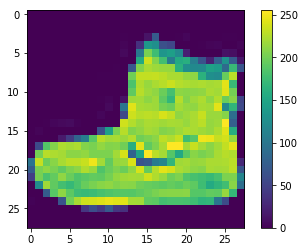

In [37]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.gca().grid(False)
plt.show()

In [38]:
train_images = train_images/255.0
test_images = test_images/255.0

In [41]:
model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28,28)),
        keras.layers.Dense(128, activation=tf.nn.relu),
        keras.layers.Dense(10, activation = tf.nn.softmax)
    ])

In [42]:
# plt.figure(figsize=(10,10))
# for i in range(25):
#     plt.subplot(5,5,i+1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid('off')
#     plt.imshow(train_images[i], cmap=plt.cm.binary)
#     plt.xlabel(class_names[train_labels[i]])
# plt.show()    

In [43]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [44]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 4s 62us/step - loss: 0.5002 - acc: 0.8249
Epoch 2/5
60000/60000 [==============================] - 3s 48us/step - loss: 0.3779 - acc: 0.8626
Epoch 3/5
60000/60000 [==============================] - 3s 47us/step - loss: 0.3386 - acc: 0.8767
Epoch 4/5
60000/60000 [==============================] - 3s 47us/step - loss: 0.3139 - acc: 0.8847
Epoch 5/5
60000/60000 [==============================] - 3s 48us/step - loss: 0.2952 - acc: 0.8910


In [45]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 26us/step
Test accuracy: 0.8778


In [46]:
predictions = model.predict(test_images)

In [48]:
predictions[0]

array([1.4251859e-04, 2.0197335e-06, 1.9860988e-06, 1.3561595e-06,
       3.0614469e-06, 1.2481161e-02, 2.9816594e-05, 5.3044803e-02,
       1.3419981e-04, 9.3415904e-01], dtype=float32)

In [49]:
np.argmax(predictions[0])

9

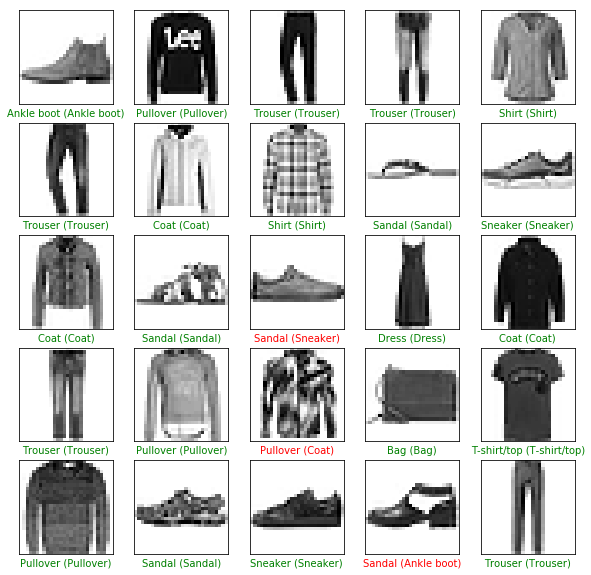

In [50]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
      color = 'green'
    else:
      color = 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label], 
                                  class_names[true_label]),
                                  color=color)